In [1]:
from packaging import version
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import tensorboard as tb

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

## Experiment 1

In [3]:
q1_sb_no_rtg_dsa = EventAccumulator("data/q1_sb_no_rtg_dsa_CartPole-v0_02-01-2021_17-32-55")
q1_sb_rtg_dsa = EventAccumulator("data/q1_sb_rtg_dsa_CartPole-v0_03-01-2021_11-11-29")
q1_sb_rtg_na = EventAccumulator("data/q1_sb_rtg_na_CartPole-v0_03-01-2021_11-39-10")


In [4]:
def convert_events_to_df(events):
    events.Reload()
    return pd.concat([pd.DataFrame(events.Scalars(tag), \
                        columns=['wall_time', 'step', tag]).drop(columns=['wall_time']).set_index('step') \
                                 for tag in events.Tags()['scalars']], axis=1)

In [5]:
q1_sb_no_rtg_dsa_df = convert_events_to_df(q1_sb_no_rtg_dsa)
q1_sb_rtg_dsa_df = convert_events_to_df(q1_sb_rtg_dsa)
q1_sb_rtg_na_df = convert_events_to_df(q1_sb_rtg_na)

Text(0.5, 1.0, 'Small Batch')

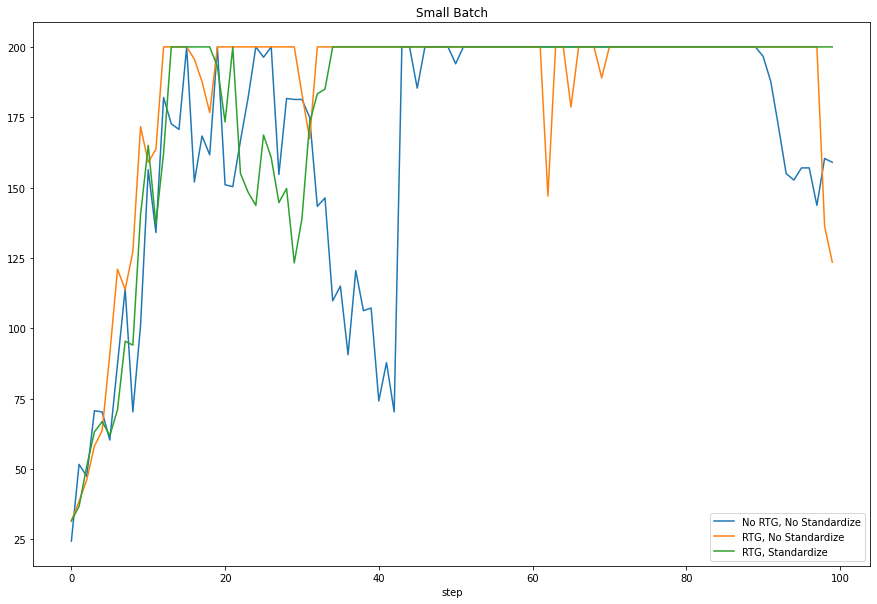

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
q1_sb_no_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='No RTG, No Standardize')
q1_sb_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, No Standardize')
q1_sb_rtg_na_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, Standardize')
ax.set_title('Small Batch')

##### FIll between data values

In [7]:
steps = q1_sb_no_rtg_dsa_df.index
mean_average_return_all_seeds = list(map(lambda z : np.mean(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))
min_average_return_all_seeds = list(map(lambda z : np.min(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))
max_average_return_all_seeds = list(map(lambda z : np.max(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))

Text(0.5, 1.0, 'Small Batch with variance')

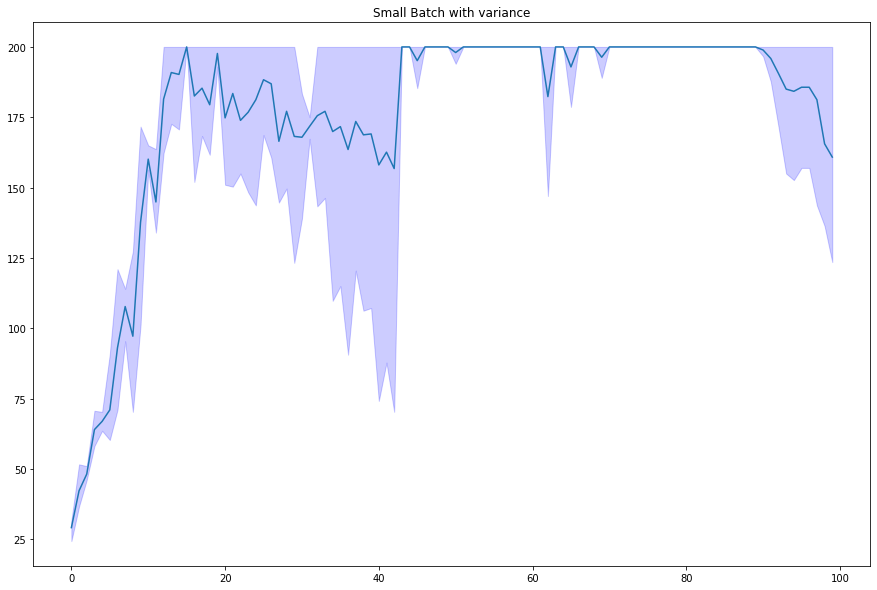

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(q1_sb_no_rtg_dsa_df.index, np.array(mean_average_return_all_seeds))
ax.fill_between(q1_sb_no_rtg_dsa_df.index, min_average_return_all_seeds, max_average_return_all_seeds,
               color = 'blue', alpha=0.2)
ax.set_title('Small Batch with variance')

In [9]:
q1_lb_no_rtg_dsa = EventAccumulator("data/q1_lb_no_rtg_dsa_CartPole-v0_03-01-2021_12-02-10")
q1_lb_rtg_dsa = EventAccumulator("data/q1_lb_rtg_dsa_CartPole-v0_03-01-2021_12-22-05")
q1_lb_rtg_na = EventAccumulator("data/q1_lb_rtg_na_CartPole-v0_03-01-2021_12-21-25")

In [10]:
q1_lb_no_rtg_dsa_df = convert_events_to_df(q1_lb_no_rtg_dsa)
q1_lb_rtg_dsa_df = convert_events_to_df(q1_lb_rtg_dsa)
q1_lb_rtg_na_df = convert_events_to_df(q1_lb_rtg_na)

Text(0.5, 1.0, 'Large Batch')

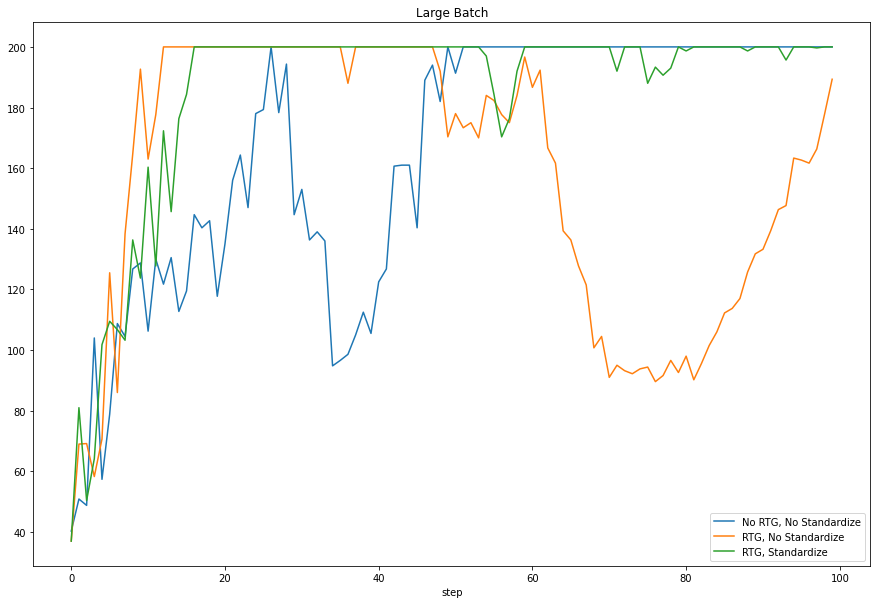

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
q1_lb_no_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='No RTG, No Standardize')
q1_lb_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, No Standardize')
q1_lb_rtg_na_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, Standardize')
ax.set_title('Large Batch')

## Experiment 2

find the smallest batch size b* and largest learning rate r* that gets to optimum
(maximum score of 1000) in less than 100 iterations.

In [24]:
# b1000
q2_b1000_lr1e_3 = EventAccumulator("data/q2_b1000_lr1e-3_InvertedPendulum-v2_25-07-2021_13-27-07")
q2_b1000_lr1e_3_df = convert_events_to_df(q2_b1000_lr1e_3)

q2_b1000_lr1e_4 = EventAccumulator("data/q2_b1000_lr1e-4_InvertedPendulum-v2_25-07-2021_14-05-10")
q2_b1000_lr1e_4_df = convert_events_to_df(q2_b1000_lr1e_4)

q2_b1000_lr5e_2 = EventAccumulator("data/q2_b1000_lr5e-2_InvertedPendulum-v2_25-07-2021_13-05-54")
q2_b1000_lr5e_2_df = convert_events_to_df(q2_b1000_lr5e_2)

q2_b1000_lr5e_3 = EventAccumulator("data/q2_b1000_lr5e-3_InvertedPendulum-v2_25-07-2021_13-44-58")
q2_b1000_lr5e_3_df = convert_events_to_df(q2_b1000_lr5e_3)

q2_b1000_lr5e_4 = EventAccumulator("data/q2_b1000_lr5e-4_InvertedPendulum-v2_25-07-2021_14-22-22")
q2_b1000_lr5e_4_df = convert_events_to_df(q2_b1000_lr5e_4)

# b5000
q2_b5000_lr1e_3 = EventAccumulator("data/q2_b5000_lr1e-3_InvertedPendulum-v2_25-07-2021_15-55-13")
q2_b5000_lr1e_3_df = convert_events_to_df(q2_b5000_lr1e_3)

q2_b5000_lr1e_4 = EventAccumulator("data/q2_b5000_lr1e-4_InvertedPendulum-v2_25-07-2021_18-28-37")
q2_b5000_lr1e_4_df = convert_events_to_df(q2_b5000_lr1e_4)

q2_b5000_lr5e_2 = EventAccumulator("data/q2_b5000_lr5e-2_InvertedPendulum-v2_25-07-2021_14-39-40")
q2_b5000_lr5e_2_df = convert_events_to_df(q2_b5000_lr5e_2)

q2_b5000_lr5e_3 = EventAccumulator("data/q2_b5000_lr5e-3_InvertedPendulum-v2_25-07-2021_17-12-03")
q2_b5000_lr5e_3_df = convert_events_to_df(q2_b5000_lr5e_3)

q2_b5000_lr5e_4 = EventAccumulator("data/q2_b5000_lr5e-4_InvertedPendulum-v2_25-07-2021_19-37-46")
q2_b5000_lr5e_4_df = convert_events_to_df(q2_b5000_lr5e_4)



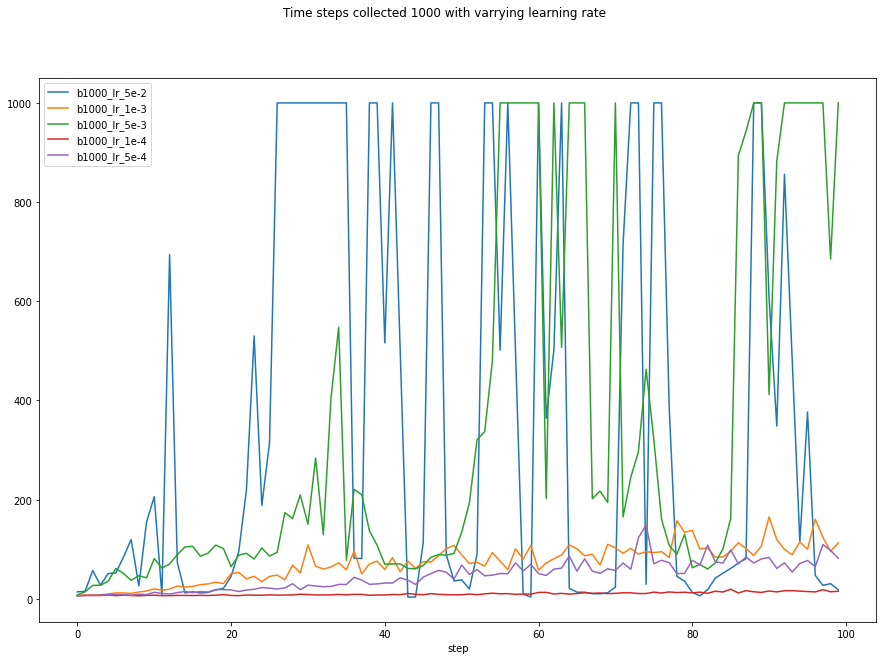

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
q2_b1000_lr5e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b1000_lr_5e-2")
q2_b1000_lr1e_3_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b1000_lr_1e-3")
q2_b1000_lr5e_3_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b1000_lr_5e-3")
q2_b1000_lr1e_4_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b1000_lr_1e-4")
q2_b1000_lr5e_4_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b1000_lr_5e-4")
fig.suptitle("Time steps collected 1000 with varrying learning rate")
plt.show()

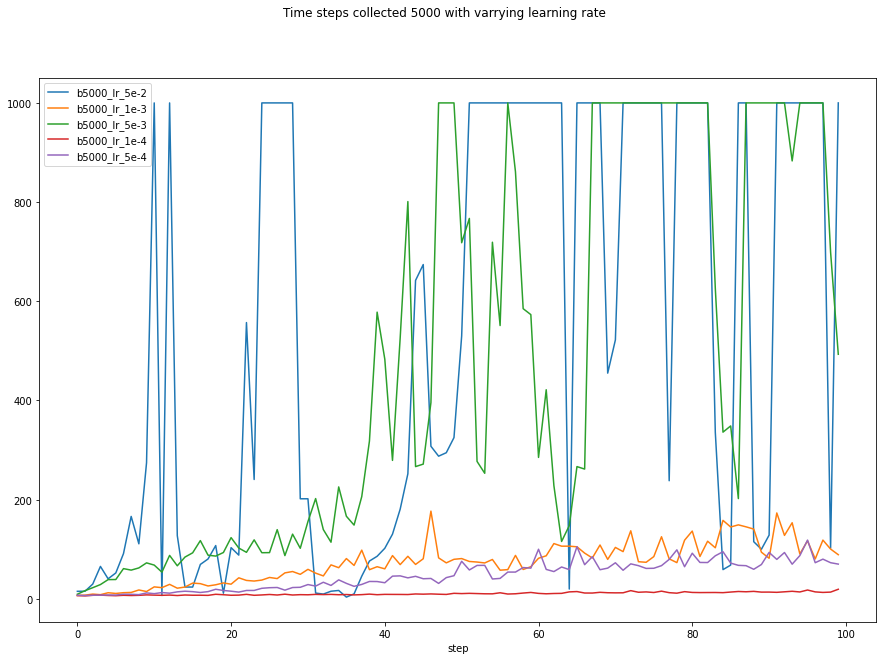

In [40]:
fig, ax = plt.subplots(figsize=(15,10))
q2_b5000_lr5e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b5000_lr_5e-2")
q2_b5000_lr1e_3_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b5000_lr_1e-3")
q2_b5000_lr5e_3_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b5000_lr_5e-3")
q2_b5000_lr1e_4_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b5000_lr_1e-4")
q2_b5000_lr5e_4_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b5000_lr_5e-4")
fig.suptitle("Time steps collected 5000 with varrying learning rate")
plt.show()

## Experiment 3

In [16]:
q3 = EventAccumulator("data/q3_b40000_r0.005_LunarLanderContinuous-v2_09-01-2021_11-04-10")
q3_df = convert_events_to_df(q3)

In [17]:
q3_df

,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,Train_EnvstepsSoFar,TimeSinceStart,Training_Loss,Initial_DataCollection_AverageReturn
step,,,,,,,,,,,,,,
0,-154.670486,132.398453,-29.103752,-352.625458,120.250000,-384.090057,214.468491,33.543648,-1336.744629,128.646301,40009.0,269.976288,0.001054,-384.090057
1,-104.876068,15.145715,-80.942001,-118.722374,110.250000,-181.013092,120.395065,41.741695,-552.936401,113.962959,80010.0,541.925903,0.008619,-384.090057
2,-116.851234,56.066502,-65.442802,-221.384186,88.800003,-114.879944,66.292572,48.883774,-402.768372,103.521965,120073.0,898.058594,-0.009639,-384.090057
3,-45.669277,37.089508,21.808975,-86.710274,103.599998,-115.054039,66.150635,54.146179,-326.835938,94.431602,160112.0,1210.895142,-0.001304,-384.090057
4,-50.984154,16.260126,-24.673805,-68.051903,107.250000,-88.142967,49.493324,48.888763,-346.771637,104.879578,200176.0,1525.636963,0.000405,-384.090057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,169.591949,0.000000,169.591949,169.591949,1000.000000,146.290161,38.273823,201.427795,9.044647,925.000000,3628167.0,30217.066406,0.013629,-384.090057
90,174.391479,0.000000,174.391479,174.391479,1000.000000,149.171173,40.666340,193.983337,23.756844,908.066650,3669030.0,30523.603516,0.010008,-384.090057
91,177.722580,0.000000,177.722580,177.722580,1000.000000,159.974579,27.191484,198.882492,37.386177,980.121948,3709215.0,30826.562500,0.007966,-384.090057


<AxesSubplot:xlabel='step'>

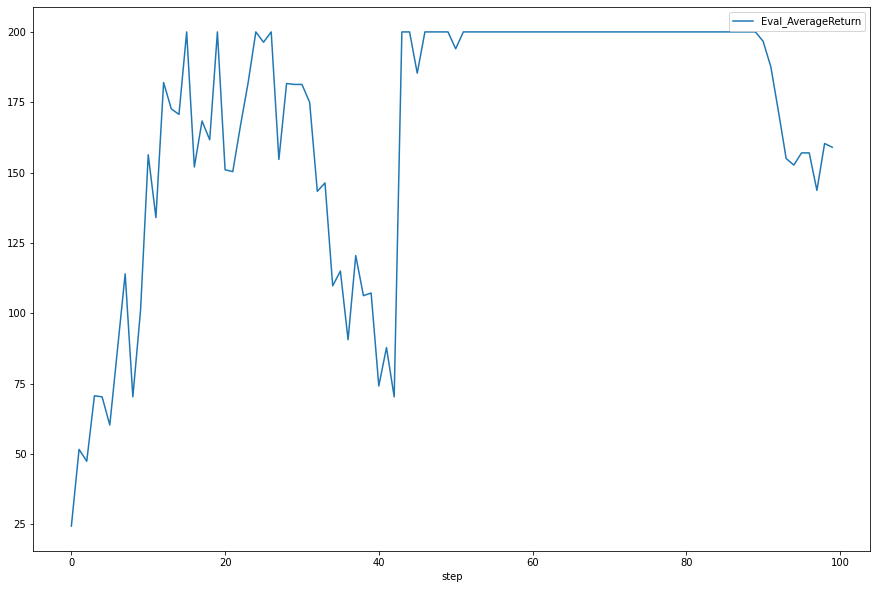

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
q1_sb_no_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax)

## Experiment 4

In [42]:
# b1000
q4_b10000_lr0_005 = EventAccumulator("data/q4_search_b10000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_09-01-2021_23-05-59")
q4_b10000_lr0_005_df = convert_events_to_df(q4_b10000_lr0_005)

q4_b10000_lr1e_2 = EventAccumulator("data/q4_search_b10000_lr1e-2_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_01-02-00")
q4_b10000_lr1e_2_df = convert_events_to_df(q4_b10000_lr1e_2)

q4_b10000_lr2e_2 = EventAccumulator("data/q4_search_b10000_lr2e-2_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_02-52-55")
q4_b10000_lr2e_2_df = convert_events_to_df(q4_b10000_lr2e_2)

q4_b30000_lr0_005 = EventAccumulator("data/q4_search_b30000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_04-45-06")
q4_b30000_lr0_005_df = convert_events_to_df(q4_b30000_lr0_005)

q4_b30000_lr1e_2 = EventAccumulator("data/q4_search_b30000_lr1e-2_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_10-09-04")
q4_b30000_lr1e_2_df = convert_events_to_df(q4_b30000_lr1e_2)

q4_b30000_lr2e_2 = EventAccumulator("data/q4_search_b30000_lr2e-2_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_15-54-59")
q4_b30000_lr2e_2_df = convert_events_to_df(q4_b30000_lr2e_2)

q4_b50000_lr0_005 = EventAccumulator("data/q4_search_b50000_lr0.005_rtg_nnbaseline_HalfCheetah-v2_10-01-2021_21-23-03")
q4_b50000_lr0_005_df = convert_events_to_df(q4_b50000_lr0_005)

q4_b50000_lr1e_2 = EventAccumulator("data/q4_search_b50000_lr1e-2_rtg_nnbaseline_HalfCheetah-v2_11-01-2021_01-53-39")
q4_b50000_lr1e_2_df = convert_events_to_df(q4_b50000_lr1e_2)

q4_b50000_lr2e_2 = EventAccumulator("data/q4_search_b50000_lr2e-2_rtg_nnbaseline_HalfCheetah-v2_11-01-2021_10-04-47")
q4_b50000_lr2e_2_df = convert_events_to_df(q4_b50000_lr2e_2)

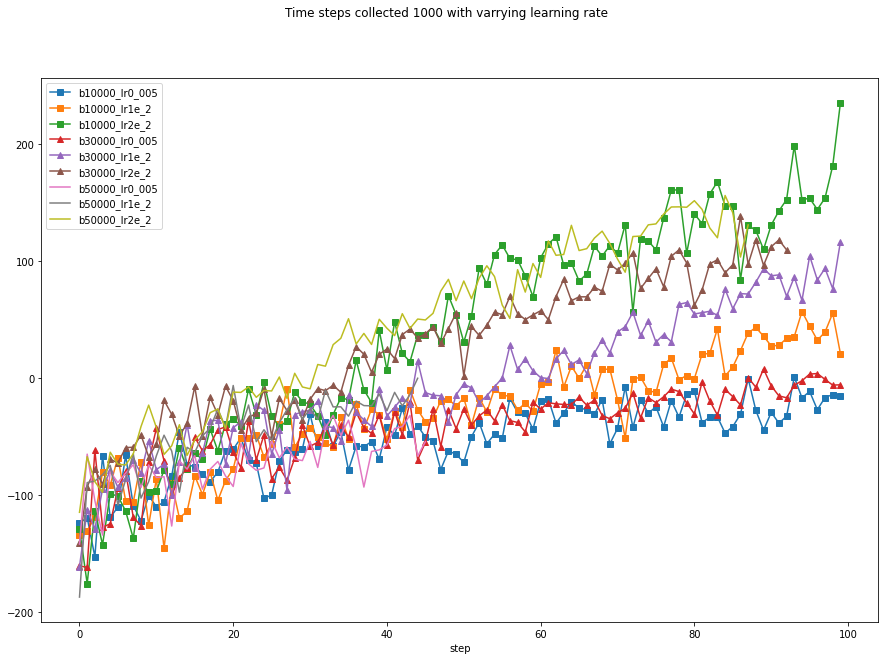

In [51]:
fig, ax = plt.subplots(figsize=(15,10))

q4_b10000_lr0_005_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b10000_lr0_005", style='s-')
q4_b10000_lr1e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b10000_lr1e_2", style='s-')
q4_b10000_lr2e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b10000_lr2e_2", style='s-')

q4_b30000_lr0_005_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b30000_lr0_005", style='^-')
q4_b30000_lr1e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b30000_lr1e_2", style='^-')
q4_b30000_lr2e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b30000_lr2e_2", style='^-')

q4_b50000_lr0_005_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b50000_lr0_005")
q4_b50000_lr1e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b50000_lr1e_2")
q4_b50000_lr2e_2_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="b50000_lr2e_2")

fig.suptitle("Time steps collected 1000 with varrying learning rate")
plt.show()

In [52]:
# b1000
q4_normal = EventAccumulator("data/q4_b10000_r0_02_HalfCheetah-v2_01-08-2021_17-31-07")
q4_normal_df = convert_events_to_df(q4_normal)

q4_nnbaseline = EventAccumulator("data/q4_b10000_r0_02_nnbaseline_HalfCheetah-v2_01-08-2021_21-37-10")
q4_nnbaseline_df = convert_events_to_df(q4_nnbaseline)

q4_rtg = EventAccumulator("data/q4_b10000_r0_02_rtg_HalfCheetah-v2_01-08-2021_19-31-57")
q4_rtg_df = convert_events_to_df(q4_rtg)

q4_rtg_baseline = EventAccumulator("data/q4_b10000_r0_02_rtg_nnbaseline_HalfCheetah-v2_01-08-2021_23-43-16")
q4_rtg_baseline_df = convert_events_to_df(q4_rtg_baseline)

<AxesSubplot:xlabel='step'>

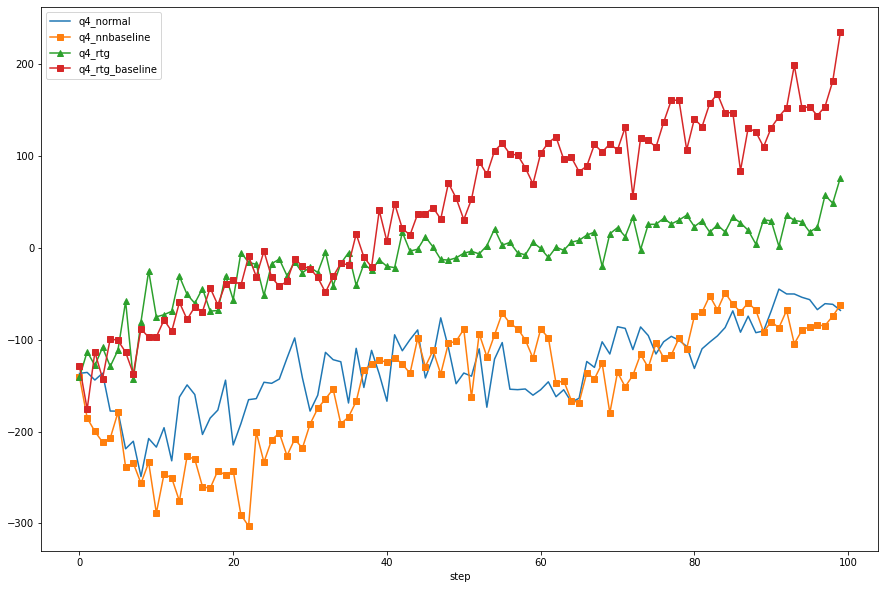

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

q4_normal_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="q4_normal")
q4_nnbaseline_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="q4_nnbaseline", style='s-')
q4_rtg_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="q4_rtg", style='^-')
q4_rtg_baseline_df.plot(use_index=True, y='Eval_AverageReturn', ax=ax, label="q4_rtg_baseline", style='s-')